# Social Media Ads Dataset

## Column Description
* UserID : Its a Numerical Column which has a specific number for each row used for identification of any persons experience 
* Gender : Its a Categorical Column which has two values
* Age : Its a Numerical Column
* EstimatedSalary : Its a Numerical Column used to calculate the expected salary for each person
* Purchased : Its a Categorical Column which has two values used to define whether the person purchased the product or not
  0 = Ignored the Ad, 1 = Bought through Ad 

#### About Dataset:
This dataset is downloaded from Kaggle. It contains data of people whom social media ads was shown and after watching these ads whether they have purchased the product or not. The dataset contains information of people including their age, gender, Estimated Salary, and whether they have purchased the product or not. It contains 5 columns and 400 entries. This dataset is used to built an Machine Learning Pipeline.

##

### Import Libraries

In [143]:
# To handle Data
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# Import iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# For Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, precision_score, mean_squared_error, r2_score

# For Classification\Regression Tasks
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from scipy import stats
import scipy as sp

# Warnings
import warnings
warnings.filterwarnings('ignore')

### Import Datasets

In [144]:
df =pd.read_csv("C:\\Users\\Faizan\\OneDrive\\Desktop\\Faizan Folder\\Excel Data\\Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,Male,19.0,NaN,0
1,15810944.0,Male,NaN,20000.0,0
2,15668575.0,NaN,26.0,43000.0,0
3,15603246.0,Female,NaN,57000.0,0
4,15804002.0,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863.0,Female,46.0,41000.0,1
396,15706071.0,Male,51.0,23000.0,1
397,15654296.0,Female,50.0,20000.0,1
398,15755018.0,Male,36.0,33000.0,0


In [145]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,Male,19.0,NaN,0
1,15810944.0,Male,NaN,20000.0,0
2,15668575.0,NaN,26.0,43000.0,0
3,15603246.0,Female,NaN,57000.0,0
4,15804002.0,Male,19.0,76000.0,0


In [146]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863.0,Female,46.0,41000.0,1
396,15706071.0,Male,51.0,23000.0,1
397,15654296.0,Female,50.0,20000.0,1
398,15755018.0,Male,36.0,33000.0,0
399,15594041.0,Female,49.0,36000.0,1


## EDA

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          397 non-null    float64
 1   Gender           396 non-null    object 
 2   Age              394 non-null    float64
 3   EstimatedSalary  396 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 15.8+ KB


In [148]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,3.970000e+02,394.000000,396.000000,400.000000
mean,1.569172e+07,37.667513,69987.373737,0.357500
std,7.164492e+04,10.516852,34089.789736,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562722e+07,29.250000,43000.000000,0.000000
50%,1.569429e+07,37.000000,70000.000000,0.000000
75%,1.575045e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Explore Gender Column

In [149]:
df['Gender'].value_counts()

Gender
Female    203
Male      193
Name: count, dtype: int64

In [150]:
df.groupby("Age")['Gender'].value_counts()

Age   Gender
18.0  Female    3
      Male      1
19.0  Male      5
      Female    2
20.0  Female    4
               ..
58.0  Male      1
59.0  Female    5
      Male      2
60.0  Male      5
      Female    2
Name: count, Length: 83, dtype: int64

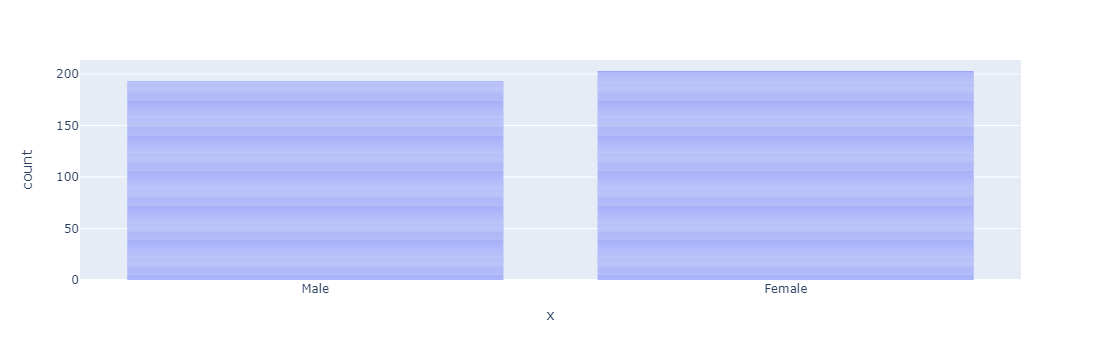

In [151]:
fig = px.bar(x=df['Gender'])
fig.show()

<Axes: xlabel='Gender', ylabel='count'>

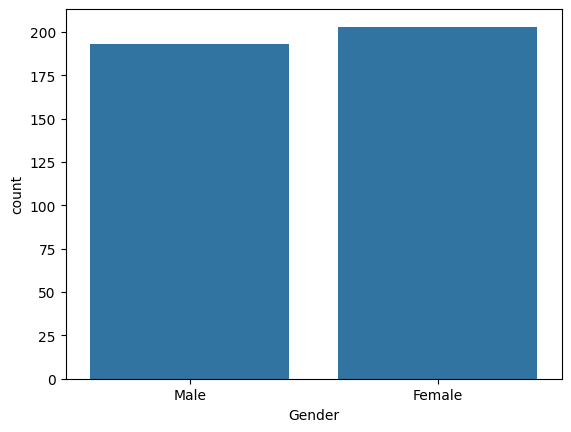

In [152]:
sns.countplot(x= df["Gender"])

### Explore Age Column

In [153]:
df['Age'].nunique()

43

In [154]:
df.groupby('Gender')['Age'].value_counts() 

Gender  Age 
Female  35.0    13
        37.0    10
        41.0     9
        26.0     8
        27.0     7
                ..
Male    52.0     1
        53.0     1
        54.0     1
        55.0     1
        58.0     1
Name: count, Length: 83, dtype: int64

In [155]:
df['Age'].max()

60.0

In [156]:
df['Age'].min()

18.0

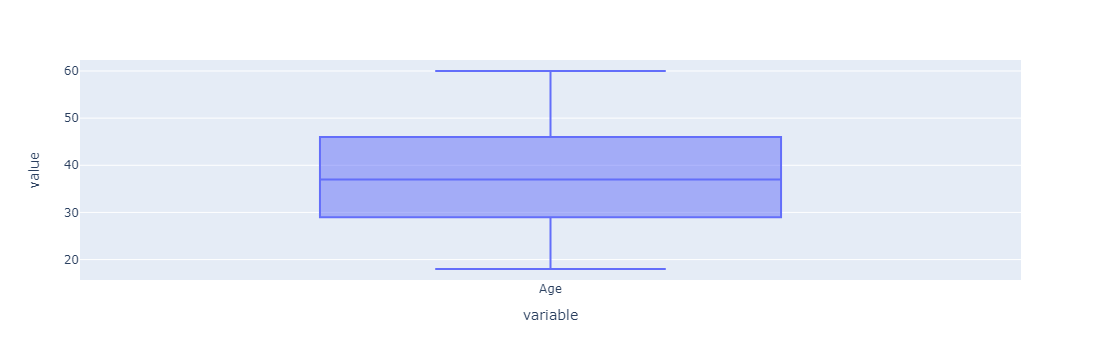

In [157]:
fig = px.box(df['Age'])
fig.show()

Mean :  37.66751269035533
Median :  37.0
Mode :  35.0


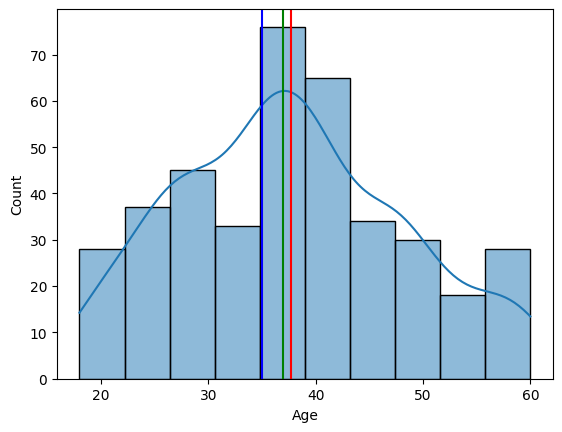

In [158]:
sns.histplot(df["Age"], kde = True)
plt.axvline(df["Age"].mean(), color="Red")
plt.axvline(df["Age"].median(), color="Green")
plt.axvline(df["Age"].mode()[0], color="Blue")

# Print 
print("Mean : ", df["Age"].mean())
print("Median : ", df["Age"].median())
print("Mode : ", df["Age"].mode()[0])

### Explore EstimatedSalary Column

In [159]:
df['EstimatedSalary'].nunique()

117

In [160]:
df.groupby('Gender')['EstimatedSalary'].value_counts() 

Gender  EstimatedSalary
Female  72000.0            7
        50000.0            5
        71000.0            5
        80000.0            5
        82000.0            5
                          ..
Male    141000.0           1
        143000.0           1
        148000.0           1
        149000.0           1
        150000.0           1
Name: count, Length: 191, dtype: int64

In [161]:
df['EstimatedSalary'].max()

150000.0

In [162]:
df['EstimatedSalary'].min()

15000.0

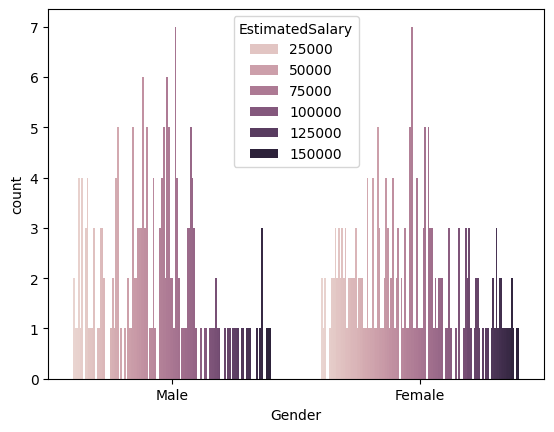

In [163]:
sns.countplot(x='Gender', hue='EstimatedSalary', data=df)
plt.show()

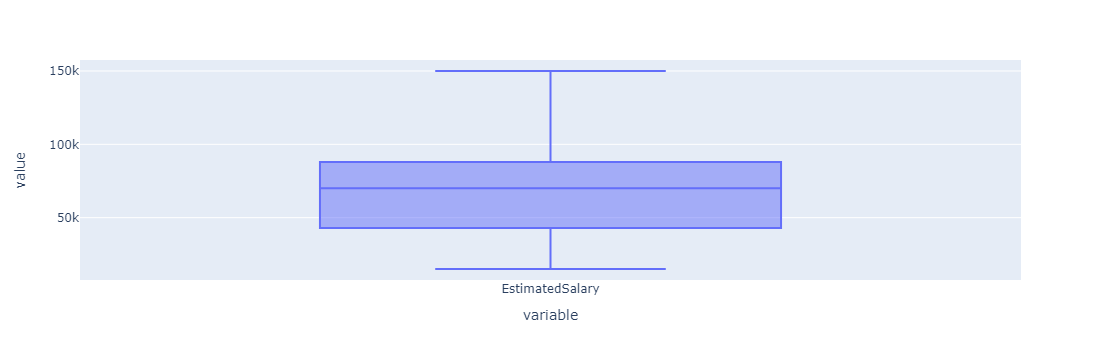

In [164]:
fig = px.box(df['EstimatedSalary'])
fig.show()

Mean :  69987.37373737374
Median :  70000.0
Mode :  72000.0
Standard Deviation :  <bound method Series.std of 0          NaN
1      20000.0
2      43000.0
3      57000.0
4      76000.0
        ...   
395    41000.0
396    23000.0
397    20000.0
398    33000.0
399    36000.0
Name: EstimatedSalary, Length: 400, dtype: float64>


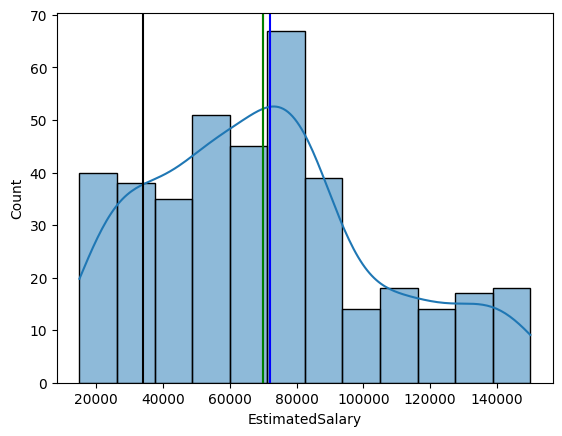

In [165]:
sns.histplot(df['EstimatedSalary'], kde=True)
plt.axvline(df['EstimatedSalary'].mean(), color='Red')
plt.axvline(df['EstimatedSalary'].median(), color='Green')
plt.axvline(df['EstimatedSalary'].mode()[0], color= 'Blue')
plt.axvline(df['EstimatedSalary'].std(), color='Black')

print("Mean : ", df["EstimatedSalary"].mean())
print("Median : ", df["EstimatedSalary"].median())
print("Mode : ", df["EstimatedSalary"].mode()[0])
print('Standard Deviation : ', df["EstimatedSalary"].std)

### Explore Purchased Column

In [166]:
df['Purchased'].nunique()

2

In [167]:
df.groupby('Gender')['Purchased'].value_counts()

Gender  Purchased
Female  0            126
        1             77
Male    0            127
        1             66
Name: count, dtype: int64

In [168]:
fig = px.bar(df, x='Purchased', y='Age')
fig.show()


In [169]:
mean_age = df['Age'].mean()
print(mean_age)


mean_a = df['EstimatedSalary'].mean()
print(mean_a)

37.66751269035533
69987.37373737374


### Distribution of Whole Dataset

<Axes: xlabel='Gender', ylabel='Age'>

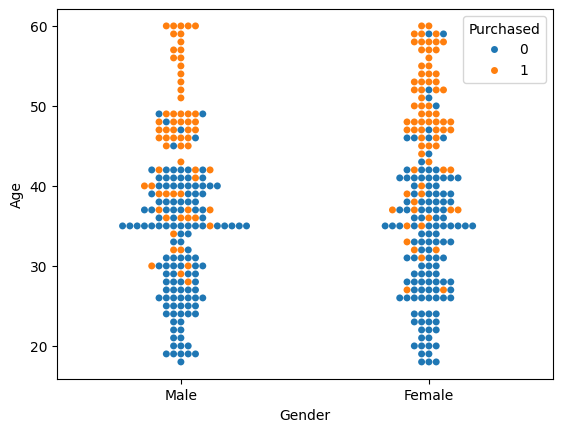

In [170]:
sns.swarmplot(data = df, x= 'Gender', y= 'Age', hue= 'Purchased')

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

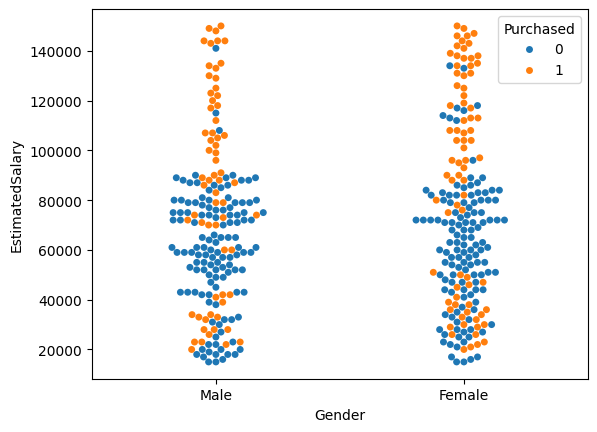

In [171]:
sns.swarmplot(data = df, x= 'Gender', y= 'EstimatedSalary', hue= 'Purchased')

## Dealing with Missing Values

In [172]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [173]:
if 'User ID' in df.columns:
    df.drop(['User ID'], axis=1, inplace=True)

In [174]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [175]:
df.isnull().sum() / len(df) * 100

Gender             1.0
Age                1.5
EstimatedSalary    1.0
Purchased          0.0
dtype: float64

In [176]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,NaN,0
1,Male,NaN,20000.0,0
2,NaN,26.0,43000.0,0
3,Female,NaN,57000.0,0
4,Male,19.0,76000.0,0


In [177]:
label_encoder_gender = LabelEncoder()
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])


In [178]:
imputer = KNNImputer(n_neighbors=5)
df[['Age',  'EstimatedSalary', 'Gender']] = imputer.fit_transform(df[['Age', 'EstimatedSalary', 'Gender']])

In [179]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1.0,19.0,43600.0,0
1,1.0,32.6,20000.0,0
2,2.0,26.0,43000.0,0
3,0.0,35.6,57000.0,0
4,1.0,19.0,76000.0,0


In [180]:
df.tail()

,Gender,Age,EstimatedSalary,Purchased
395,0.0,46.0,41000.0,1
396,1.0,51.0,23000.0,1
397,0.0,50.0,20000.0,1
398,1.0,36.0,33000.0,0
399,0.0,49.0,36000.0,1


In [181]:
df.isnull().sum() / len(df) * 100

Gender             0.0
Age                0.0
EstimatedSalary    0.0
Purchased          0.0
dtype: float64

### Dealing with Outliers

<Axes: ylabel='Age'>

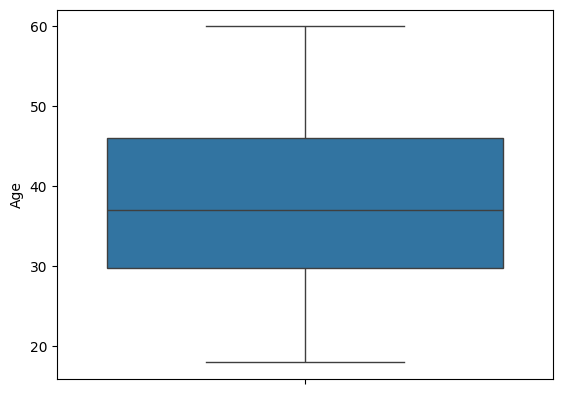

In [182]:
sns.boxplot(df['Age'])

<Axes: ylabel='EstimatedSalary'>

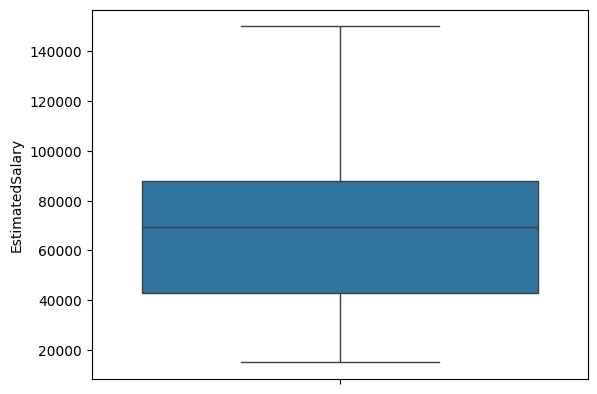

In [183]:
sns.boxplot(df['EstimatedSalary'])

## Statistical Analysis

In [184]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1.0,19.0,43600.0,0
1,1.0,32.6,20000.0,0
2,2.0,26.0,43000.0,0
3,0.0,35.6,57000.0,0
4,1.0,19.0,76000.0,0


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    float64
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    float64
 3   Purchased        400 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


### Data Normalization

Null Hypothesis : Data is Normal.

Alternate Hypothesis : Data is not Normal.

p-value : 1.0136187751274708e-05. Sample look Gaussian\Normally Distributed (Could Not Reject H0)
p-value: 4.776358412886899e-09. Sample does not look Gaussian\Normally Distributed (Reject H0)


,Gender,Age,EstimatedSalary,Purchased
0,1.0,19.0,43600.0,0
1,1.0,32.6,20000.0,0
2,2.0,26.0,43000.0,0
3,0.0,35.6,57000.0,0
4,1.0,19.0,76000.0,0


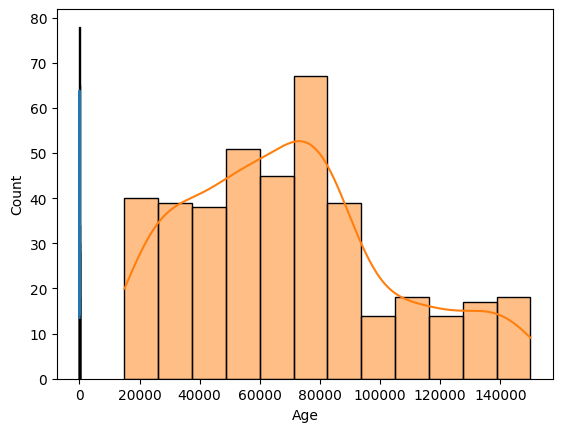

In [186]:
## Plot Numerical Column
sns.histplot(df['Age'], kde=True)
sns.histplot(df['EstimatedSalary'], kde=True)

## Perform Shapiro-Wilk method to test the normality for Age Column
statistic, p = stats.shapiro(df['Age'])

## Print the result
if p < 0.05:
    print(f'p-value : {p}. Sample look Gaussian\\Normally Distributed (Could Not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian\\Normally Distributed (Reject H0)')

## Perform Shapiro-Wilk method to test the normality for EstimatedSalary column
statistic, p = stats.shapiro(df['EstimatedSalary'])

## Print the result
if p > 0.05:
    print(f'p-value : {p}. Sample look Gaussian\\Normally Distributed (Could Not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian\\Normally Distributed (Reject H0)')

df.head()

 

### Homoginity Test

Levene Test

Null Hypothesis: Data is Homogenous.

Alternative Hypothesis: Data is not Homogenous.

In [187]:
age_column= df['Age']
salary_column= df['EstimatedSalary']

## Perform Levene Test with age column and EstimatedSalary column
w_stat, p_val = stats.levene(age_column, salary_column)

print('W_statistic:', w_stat)
print('p_value:', p_val)

if  p_val <= 0.05 :
    print(f'Variances are Equal: Fail to Reject the Null Hypothesis')
else:
    print(f'Variances are not Equal: Reject the Null Hypothesis')


W_statistic: 725.2877191073871
p_value: 3.806294509641619e-114
Variances are Equal: Fail to Reject the Null Hypothesis


### Chi-Squared Test

In [188]:
contigency_table = pd.crosstab(df['Gender'], df['Purchased'])
contigency_table

Purchased,0,1
Gender,,
0.0,126,77
1.0,127,66
2.0,4,0


In [189]:
chi2, p, dof, expected = stats.chi2_contingency(contigency_table) 

#Print
print('Chi Squared Test : ', chi2)
print('P-value : ', p)
print('Degree of Freedom : ', dof)
print('Expected : ', expected)

Chi Squared Test :  2.8487703224516796
P-value :  0.24065638260566696
Degree of Freedom :  2
Expected :  [[130.4275  72.5725]
 [124.0025  68.9975]
 [  2.57     1.43  ]]


### Wilcoxon (Paired Sampling)

In [190]:
from scipy.stats import wilcoxon

##Defining Column
age_column = df['Age']
salary_column = df['EstimatedSalary']

# Perform Wilcoxon signed-rank test between 'Age' and 'EstimatedSalary'
statistic_1, p_val_1 = wilcoxon(age_column, salary_column)
print("Test statistic between Age and EstimatedSalary:", statistic_1)
print("p-value between Age and EstimatedSalary:", p_val_1)

## Print the Result
alpha = 0.05  
if any(p_val < alpha for p_val in [p_val_1]):
    print("\nThere is a significant difference between at least one pair of the Age, EstimatedSalary columns.")
else:
    print("\nThere is no significant difference between any pair of the Age, EstimatedSalary columns.")

Test statistic between Age and EstimatedSalary: 0.0
p-value between Age and EstimatedSalary: 2.7296754597870702e-67

There is a significant difference between at least one pair of the Age, EstimatedSalary columns.


### Correlation

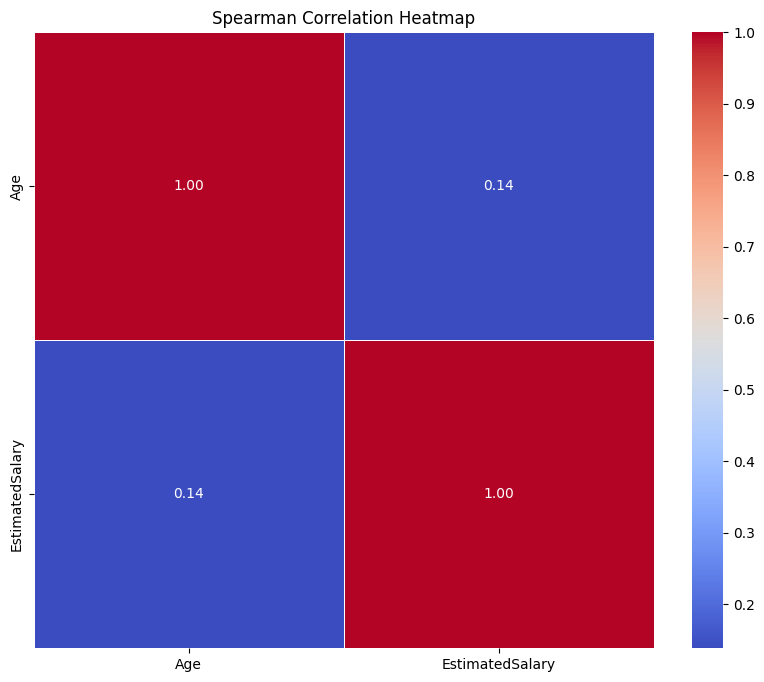

In [191]:
selected_columns = ["Age", "EstimatedSalary"]
selected_df = df[selected_columns]

# Calculate Spearman correlation matrix
correlation_matrix = selected_df.corr(method='spearman')

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

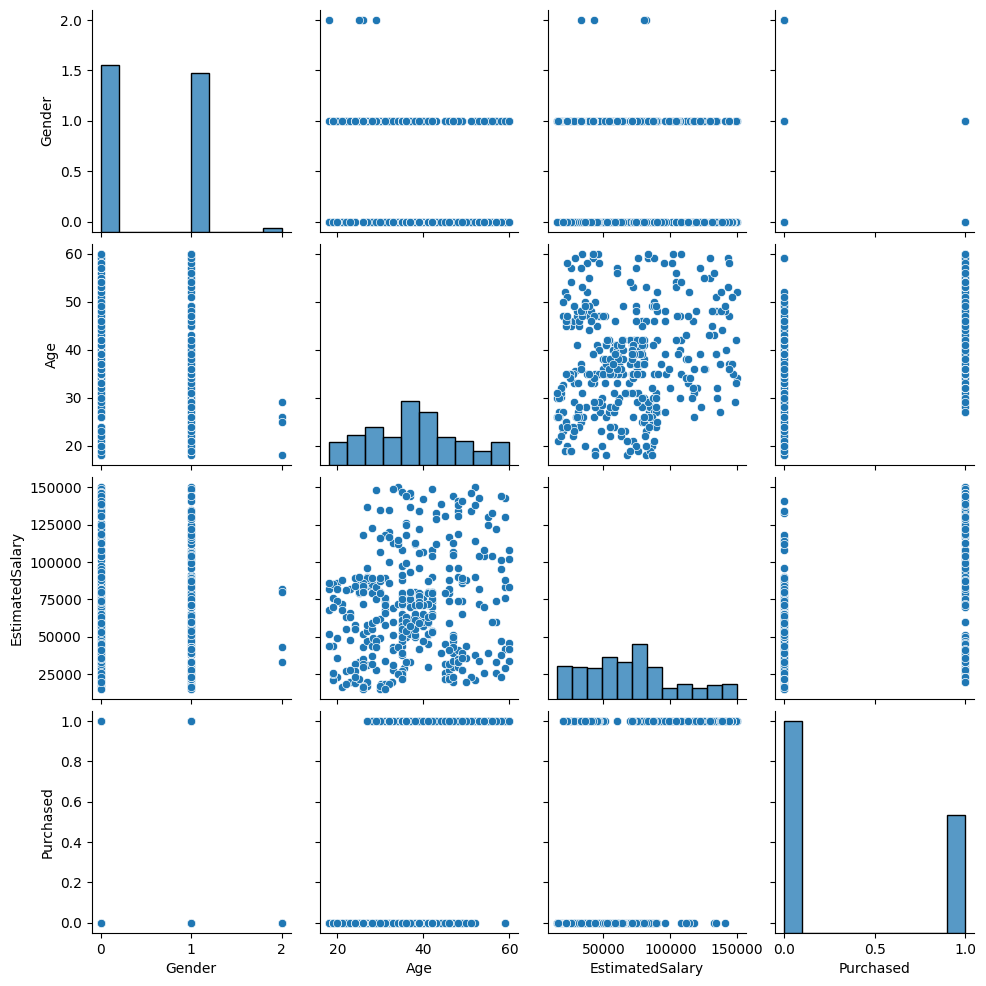

In [192]:
sns.pairplot(df)

## Machine Learning

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    float64
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    float64
 3   Purchased        400 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


### Define Features and Labels

In [220]:
x = df[['Age', 'Purchased', 'Gender']]
y = df[['EstimatedSalary']]

### Train_Test_Split

In [221]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 42) 

### Best Model Selection

In [222]:
## Hyperparameter Tuning
models = {
            'Linear Regression' : (LinearRegression(), {}),
            'Decision Tree Regressor' : (DecisionTreeRegressor(), {'max_depth' : [None, 5, 10]}),
            'SVR' : (SVR(), {'kernel' :  ['rbf', 'poly', 'sigmoid']}),
            'Random Forest Regressor' : (RandomForestRegressor(), {'n_estimators' : [10, 100]}),
            'KNeighborsRegressor' : (KNeighborsRegressor(), {'n_neighbors' : np.arange(3, 100, 2)}),
            'GradientBoostingRegressor' : (GradientBoostingRegressor(), {'n_estimators' : [10, 100]}),
            'XGBRegressor' : (XGBRegressor(), {'n_estimators' : [10, 100]})
}

best_algorithm = None
best_metric = float('inf')  # Initialize with a large value for MSE

for name, (model, params) in models.items():
    # Create a Cross-Validation
    pipeline = GridSearchCV(model, params, cv=5)
    
    # Fit x_train and y_train in the model 
    pipeline.fit(x_train, y_train)
    
    # Get the best parameters and the best estimator (model)
    best_params = pipeline.best_params_
    best_model = pipeline.best_estimator_
    
    # Make prediction from the best model
    y_pred = best_model.predict(x_test)
    
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    # Check if this model performs better
    if mse < best_metric:
        best_metric = mse
        best_algorithm = name
    
    # Print the performance metrics
    print(name, 'Best Parameters:', best_params)
    print('Evaluation Metrics')
    print(name, 'MSE: ', mse)
    print(name, 'R2: ', r2_score(y_test, y_pred))
    print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    print('\n')

# Print the name of the best algorithm highlighted
print("Best Algorithm:", best_algorithm)

Linear Regression Best Parameters: {}
Evaluation Metrics
Linear Regression MSE:  1032874581.0809349
Linear Regression R2:  0.10936028245680773
Linear Regression MAE:  25671.763188663987


Decision Tree Regressor Best Parameters: {'max_depth': 5}
Evaluation Metrics
Decision Tree Regressor MSE:  1074970862.9186237
Decision Tree Regressor R2:  0.07306098605404365
Decision Tree Regressor MAE:  25905.62616598547


SVR Best Parameters: {'kernel': 'rbf'}
Evaluation Metrics
SVR MSE:  1168655860.2494645
SVR R2:  -0.007722858460217363
SVR MAE:  27947.94044738328


Random Forest Regressor Best Parameters: {'n_estimators': 100}
Evaluation Metrics
Random Forest Regressor MSE:  1258985459.9835806
Random Forest Regressor R2:  -0.08561336972518463
Random Forest Regressor MAE:  27950.517852631332


KNeighborsRegressor Best Parameters: {'n_neighbors': 11}
Evaluation Metrics
KNeighborsRegressor MSE:  1088546415.9779613
KNeighborsRegressor R2:  0.06135489224194923
KNeighborsRegressor MAE:  26611.666666666

### Model Fiiting

In [223]:
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor()

### Prediction

In [224]:
model.predict([[30, 0, 0]])

array([69710.38382726])

In [225]:
model.predict([[40, 0, 0]])

array([66542.83179491])

In [226]:
model.predict([[70, 0, 0]])

array([76349.07949616])

In [227]:
model.predict([[30, 1, 0]])

array([124929.01294174])

In [228]:
model.predict([[30, 0, 1]])

array([58251.0362367])

In [229]:
model.predict([[70, 1, 0]])

array([74331.1325496])

In [230]:
model.predict([[35, 1, 1]])

array([110700.64858882])